# Exploratory Data Analysis

Important links
https://www.investopedia.com/terms/c/chargeoff.asp
https://www.investopedia.com/terms/d/delinquent.asp

#### Tax lien
A tax lien is a lien imposed by law upon a property to secure the payment of taxes. A tax lien may be imposed for delinquent taxes owed on real property or personal property, or as a result of failure to pay income taxes or other taxes.
#### dti: 
The debt-to-income ratio of the borrower (amount of debt divided by annual income).
#### pub.rec: 
The borrower’s number of derogatory public records (bankruptcy filings, tax liens, or judgments).
#### grades: 
Grading done according to loans and their risk which translates in higher risk loans paying higher interests
#### loan term:
A loan term is the length of time it will take for a loan to be completely paid off when the borrower is making regular payments. A loan term is the duration of the loan until it's paid off, such as 60 months for an auto loan or 30 years for a mortgage.

In [1]:
#Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from sklearn.preprocessing import OrdinalEncoder
import datetime
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

## Reading CSV and reviewing the dataset

In [2]:
data = pd.read_csv("LoanStats3a.csv", skiprows=[0])
loan_df = pd.DataFrame(data)
loan_df.head()

C:\Users\Mean Machine\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
loan_df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,dti,delinq_2yrs,inq_last_6mths,...,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,0.0,42535.000000,42506.000000,42506.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.000000,160.000000,160.000000
mean,NaN,11089.722581,10821.585753,10139.938785,322.623063,6.913656e+04,NaN,13.373043,0.152449,1.081424,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4272.137875,49.905875,1.200000
std,NaN,7410.938391,7146.914675,7131.598014,208.927216,6.409635e+04,NaN,6.726315,0.512406,1.527455,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3119.373774,15.563690,4.085255
min,NaN,500.000000,500.000000,0.000000,15.670000,1.896000e+03,NaN,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193.290000,10.690000,0.000000
25%,NaN,5200.000000,5000.000000,4950.000000,165.520000,4.000000e+04,NaN,8.200000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1842.750000,40.000000,0.000000
50%,NaN,9700.000000,9600.000000,8500.000000,277.690000,5.900000e+04,NaN,13.470000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3499.350000,49.970000,0.000000
75%,NaN,15000.000000,15000.000000,14000.000000,428.180000,8.250000e+04,NaN,18.680000,0.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5701.100000,60.652500,0.000000
max,NaN,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,NaN,29.990000,13.000000,33.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14798.200000,92.740000,24.000000


In [4]:
loan_df.dtypes

id                                             object
member_id                                     float64
loan_amnt                                     float64
funded_amnt                                   float64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

In [5]:
loan_df.isna().sum() #to check for null values in each column/feature

id                                            42539
member_id                                     42542
loan_amnt                                         7
funded_amnt                                       7
funded_amnt_inv                                   7
term                                              7
int_rate                                          7
installment                                       7
grade                                             7
sub_grade                                         7
emp_title                                      2633
emp_length                                     1119
home_ownership                                    7
annual_inc                                       11
verification_status                               7
issue_d                                           7
loan_status                                       7
pymnt_plan                                        7
url                                           42542
desc        

## Removing NaN values

In [6]:
loan_df = loan_df.dropna(axis=1, how='all', thresh=35000) #drop features with 80% null values
loan_df = loan_df.drop(axis=0, index=[39786, 39787, 39788, 42538, 42539, 42540, 42541]) # null rows
loan_df 

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag
0,5000.0,5000.0,4975.00000,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
1,2500.0,2500.0,2500.00000,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
2,2400.0,2400.0,2400.00000,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
3,10000.0,10000.0,10000.00000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
4,3000.0,3000.0,3000.00000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
5,5000.0,5000.0,5000.00000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
6,7000.0,7000.0,7000.00000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
7,3000.0,3000.0,3000.00000,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
8,5600.0,5600.0,5600.00000,60 months,21.28%,152.39,F,F2,NaN,4 years,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
9,5375.0,5375.0,5350.00000,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N


In [7]:
# drop columns of null or useless constant values
loan_df = loan_df.drop(columns=['out_prncp','out_prncp_inv','zip_code', 'initial_list_status', 'pymnt_plan','hardship_flag', 'disbursement_method', 'application_type'])

In [8]:
loan_df.dtypes

loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
purpose                        object
title                          object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                     object
total_acc   

In [9]:
loan_df.shape

(42535, 45)

## Cleaning values

In [10]:
loan_df.loan_amnt=loan_df.loan_amnt.dropna()
loan_df.loan_amnt=loan_df.loan_amnt.astype(int)
loan_df.funded_amnt=loan_df.funded_amnt.dropna()
loan_df.funded_amnt=loan_df.funded_amnt.astype(int)
loan_df.funded_amnt_inv=loan_df.funded_amnt_inv.dropna()
loan_df.funded_amnt_inv=loan_df.funded_amnt_inv.astype(int) 

In [11]:
loan_df.term = loan_df.term.str.replace(r'\D', '')
loan_df.term = loan_df.term.fillna(int(loan_df.term.value_counts().idxmax()))

In [12]:
loan_df.int_rate = loan_df.int_rate.str.replace('%', '').astype(float)
loan_df.int_rate = loan_df.int_rate.fillna(float(loan_df.int_rate.mean()))

In [13]:
#Converting to datatime format
loan_df['issue_d'] = loan_df['issue_d'].apply(lambda x: datetime.datetime.strptime(x, '%b-%y'))

loan_df.earliest_cr_line = loan_df.earliest_cr_line.astype(str)
loan_df.earliest_cr_line = loan_df.earliest_cr_line.replace('nan','Oct-99')
loan_df.earliest_cr_line = loan_df.earliest_cr_line.apply(lambda x: datetime.datetime.strptime(x, '%b-%y'))

In [14]:
# adding Issue_Month and Issue_Year columns
loan_df.issue_month = loan_df.issue_d.dt.month
loan_df.issue_month = loan_df.issue_d.dt.year

C:\Users\Mean Machine\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [15]:
#replace missing values for grade, sub_grade with max value
loan_df.grade = loan_df.grade.fillna(int(loan_df['term'].value_counts().idxmax()))
loan_df.sub_grade = loan_df.sub_grade.fillna(int(loan_df['term'].value_counts().idxmax()))

#replace missing values for emp_title with Not available
loan_df.emp_title = loan_df.emp_title.fillna("Unknown")

In [16]:
#replacing missing values with 0
loan_df.emp_length.replace('n/a', np.nan,inplace=True)
loan_df.emp_length.fillna(value=0,inplace=True)

#convert categorical value into numerical value
loan_df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
loan_df['emp_length'] = loan_df['emp_length'].astype(int)

In [17]:
loan_df['emp_length'].value_counts()

10    9369
1     8657
2     4743
3     4364
4     3649
5     3458
6     2375
7     1875
8     1592
9     1341
0     1112
Name: emp_length, dtype: int64

In [18]:
#replace missing values for home_ownership with max value
loan_df.home_ownership = loan_df.home_ownership.fillna("OTHER")

# drop the record if the annual_inc value is missing 
loan_df.annual_inc = loan_df.annual_inc.dropna()
#loan.annual_inc=loan.annual_inc.astype(int)

In [19]:
#replace missing values for loan_status with Not available
loan_df.loan_status = loan_df.loan_status.fillna("Not available")

#replace missing values for loan_status with Not available
loan_df.purpose = loan_df.purpose.fillna("other")

In [20]:
#replace missing values for title with Not available
loan_df.title = loan_df.title.fillna("Not available")

#replace missing values for addr_state with XX (random characters)
loan_df.addr_state = loan_df.addr_state.fillna("XX")

#drop the record if the value of dti is missing 
loan_df.dti = loan_df.dti.fillna(0)
loan_df.dti = loan_df.dti.astype(float) 

#replace missing values for delinq_2yrs with max value count
loan_df.delinq_2yrs = loan_df.delinq_2yrs.fillna(loan_df.delinq_2yrs.value_counts().idxmax()).astype(int)

#replace missing values for inq_last_6mths with 0
loan_df.inq_last_6mths = loan_df.inq_last_6mths.fillna(0).astype(int)

In [21]:
#replace missing values for Term with max value
loan_df.pub_rec = loan_df.pub_rec.fillna(loan_df.pub_rec.value_counts().idxmax())

#replace missing values for mths_since_last_delinq with 0
loan_df.revol_bal = loan_df.revol_bal.dropna()

#replace missing values for revol_util with 0
loan_df.revol_util = loan_df.revol_util.dropna()

In [22]:
obj_df = loan_df.select_dtypes(include=['object']).columns.values
loan_df[obj_df] = loan_df[obj_df].fillna('Unknown')

In [23]:
# null values for object types
loan_df.select_dtypes(exclude=[np.number]).isnull().sum()

term                    0
grade                   0
sub_grade               0
emp_title               0
home_ownership          0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
addr_state              0
earliest_cr_line        0
revol_util              0
last_pymnt_d            0
last_credit_pull_d      0
debt_settlement_flag    0
dtype: int64

In [24]:
# null values for num types
loan_df.select_dtypes(include=[np.number]).isnull().sum()

loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
int_rate                         0
installment                      0
emp_length                       0
annual_inc                       4
dti                              0
delinq_2yrs                      0
inq_last_6mths                   0
open_acc                        29
pub_rec                          0
revol_bal                        0
total_acc                       29
total_pymnt                      0
total_pymnt_inv                  0
total_rec_prncp                  0
total_rec_int                    0
total_rec_late_fee               0
recoveries                       0
collection_recovery_fee          0
last_pymnt_amnt                  0
collections_12_mths_ex_med     145
policy_code                      0
acc_now_delinq                  29
chargeoff_within_12_mths       145
delinq_amnt                     29
pub_rec_bankruptcies          1365
tax_liens           

In [25]:
#annual_inc - there are 4 blank records, each doesn't have a employer so replacing it with zero
loan_df.annual_inc = loan_df.annual_inc.fillna(0)

In [26]:
loan_df.loan_amnt = loan_df.loan_amnt.fillna(0)

loan_df.emp_length.unique()

array([10,  1,  3,  8,  9,  4,  5,  6,  2,  7,  0], dtype=int64)

In [27]:
#loan['emp_length'] = loan.emp_length.map(int)
loan_df.dtypes

loan_amnt                              int32
funded_amnt                            int32
funded_amnt_inv                        int32
term                                  object
int_rate                             float64
installment                          float64
grade                                 object
sub_grade                             object
emp_title                             object
emp_length                             int32
home_ownership                        object
annual_inc                           float64
verification_status                   object
issue_d                       datetime64[ns]
loan_status                           object
purpose                               object
title                                 object
addr_state                            object
dti                                  float64
delinq_2yrs                            int32
earliest_cr_line              datetime64[ns]
inq_last_6mths                         int32
open_acc  

In [28]:
loan_df['grade'] = loan_df['grade'].astype('str') 
loan_df.dtypes

loan_amnt                              int32
funded_amnt                            int32
funded_amnt_inv                        int32
term                                  object
int_rate                             float64
installment                          float64
grade                                 object
sub_grade                             object
emp_title                             object
emp_length                             int32
home_ownership                        object
annual_inc                           float64
verification_status                   object
issue_d                       datetime64[ns]
loan_status                           object
purpose                               object
title                                 object
addr_state                            object
dti                                  float64
delinq_2yrs                            int32
earliest_cr_line              datetime64[ns]
inq_last_6mths                         int32
open_acc  

In [29]:
obj_df = loan_df.select_dtypes(include=['object']).columns.values
loan_df[obj_df] = loan_df[obj_df].fillna('Unknown')

In [30]:
loan_df[obj_df].columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'loan_status', 'purpose', 'title', 'addr_state',
       'revol_util', 'last_pymnt_d', 'last_credit_pull_d',
       'debt_settlement_flag'],
      dtype='object')

# Graphs

In [31]:
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,debt_settlement_flag
0,5000,5000,4975,36,10.65,162.87,B,B2,Unknown,10,...,171.62,Aug-18,0.0,1.0,0.0,0.0,0.0,0.0,0.0,N
1,2500,2500,2500,60,15.27,59.83,C,C4,Ryder,1,...,119.66,Oct-16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,N
2,2400,2400,2400,36,15.96,84.33,C,C5,Unknown,10,...,649.91,Jun-17,0.0,1.0,0.0,0.0,0.0,0.0,0.0,N
3,10000,10000,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,...,357.48,Apr-16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,N
4,3000,3000,3000,60,12.69,67.79,B,B5,University Medical Group,1,...,67.30,Apr-18,0.0,1.0,0.0,0.0,0.0,0.0,0.0,N


In [32]:
loan_df.isna().sum()

loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                        0
emp_length                       0
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
purpose                          0
title                            0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                        29
pub_rec                          0
revol_bal                        0
revol_util                       0
total_acc                       29
total_pymnt                      0
total_pymnt_inv     

In [33]:
loan_df.loan_status.value_counts()

Fully Paid                                             34116
Charged Off                                             5670
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Name: loan_status, dtype: int64

### Ratio of Loan Statuses:

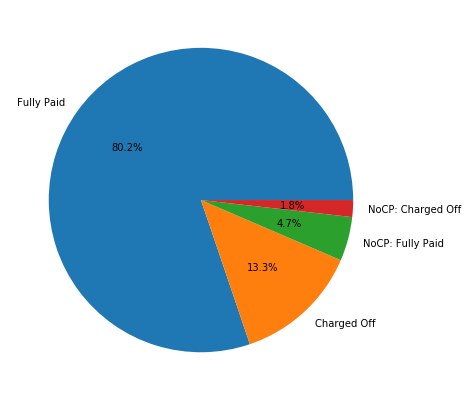

In [34]:
plt.figure(figsize=(7, 7))
plt.pie(loan_df.loan_status.value_counts(), labels=['Fully Paid', 'Charged Off', 'NoCP: Fully Paid', 'NoCP: Charged Off'], autopct='%1.1f%%')
plt.show()

### Loan Statuses

In [36]:
loan_df = loan_df[(loan_df["loan_status"] == "Fully Paid") |
                            (loan_df["loan_status"] == "Charged Off")]

mapping_dictionary = {"loan_status":{ "Fully Paid": 1, "Charged Off": 0}}
loan_df = loan_df.replace(mapping_dictionary)

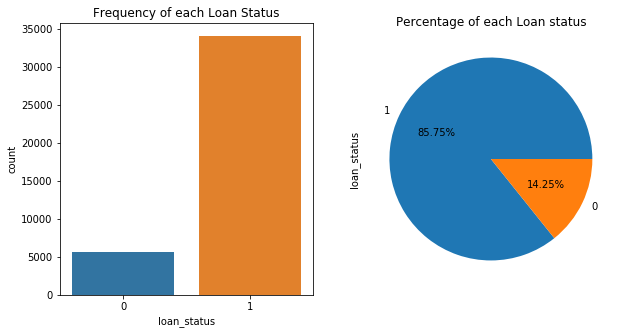

In [37]:
fig, axs = plt.subplots(1,2,figsize=(10,5))
sns.countplot(x='loan_status', data=loan_df, ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")

loan_df.loan_status.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Loan status")
plt.show()

### Loans Issued over Time

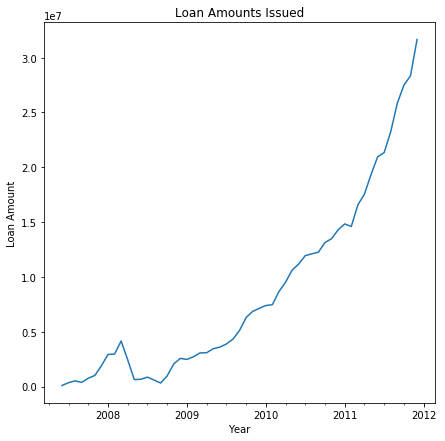

In [35]:
plt.figure(figsize=(7, 7))
loan_df.issue_d = pd.to_datetime(loan_df.issue_d)
loan_df.groupby('issue_d')['loan_amnt'].sum().plot()
plt.title('Loan Amounts Issued')
plt.xlabel('Year')
plt.ylabel('Loan Amount')
plt.show()

## Loans Issused wrt Employment Length

In [38]:
loan_df.emp_length.value_counts()

10    8899
1     7837
2     4394
3     4098
4     3444
5     3286
6     2231
7     1775
8     1485
9     1259
0     1078
Name: emp_length, dtype: int64

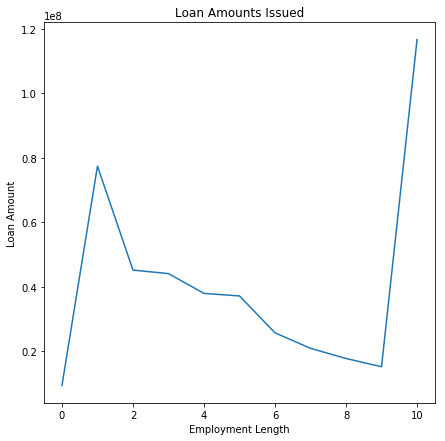

In [39]:
plt.figure(figsize=(7, 7))
loan_df.emp_length = loan_df.emp_length.sort_values()
loan_df.groupby('emp_length')['loan_amnt'].sum().plot()
plt.title('Loan Amounts Issued')
plt.xlabel('Employment Length')
plt.ylabel('Loan Amount')
plt.show()

### Interest Rate Increase by Employment Length

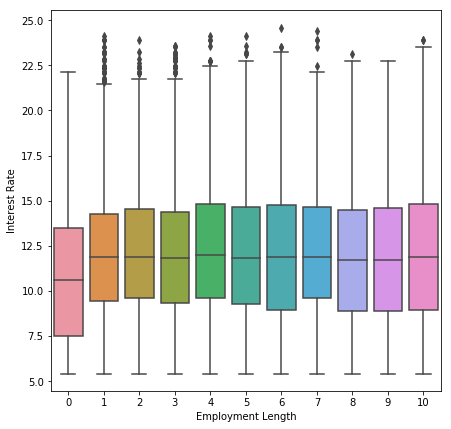

In [40]:
plt.figure(figsize=(7, 7))
sns.boxplot(x='emp_length',y="int_rate",data = loan_df)
plt.xlabel('Employment Length')
plt.ylabel('Interest Rate')
plt.show()

### Grades wrt Home Ownership

In [41]:
loan_df = loan_df[(loan_df["home_ownership"] == "RENT") | 
                  (loan_df["home_ownership"] == "MORTGAGE") |
                  (loan_df["home_ownership"] == "OWN") |
                  (loan_df["home_ownership"] == "OTHER") |
                  (loan_df["home_ownership"] == "NONE")]

mapping_dictionary = {"home_ownership":{ "OWN": 1, "MORTGAGE": 2, "RENT": 3, "OTHER": 4, "NONE": 5}}
loan_df = loan_df.replace(mapping_dictionary)

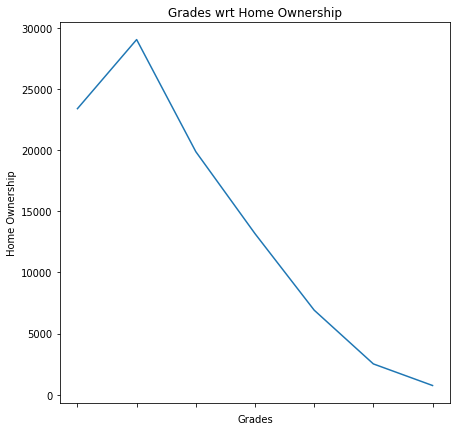

In [42]:
plt.figure(figsize=(7, 7))
loan_df.issue_d = pd.to_datetime(loan_df.issue_d)
loan_df.groupby('grade')['home_ownership'].sum().plot()
plt.title('Grades wrt Home Ownership')
plt.xlabel('Grades')
plt.ylabel('Home Ownership')
plt.show()

### Bankruptcies

In [43]:
loan_df.pub_rec.value_counts()

0.0    37665
1.0     2060
2.0       51
3.0        8
4.0        2
Name: pub_rec, dtype: int64

In [44]:
loan_df.pub_rec_bankruptcies.value_counts()

0.0    37404
1.0     1678
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

ValueError: x and y must have same first dimension, but have shapes (3,) and (5,)

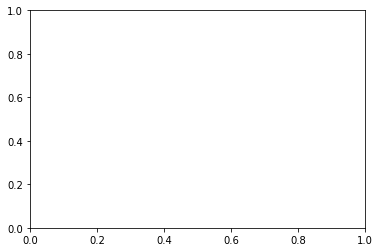

In [45]:
plt.plot(loan_df.pub_rec_bankruptcies.value_counts(), loan_df.pub_rec.value_counts())
plt.show()

### How many people filed for bankruptcy in which State:

### Borrowers in each state:

In [ ]:
# Initialize the map:
m = folium.Map(location=[37, -102], zoom_start=5)
 
# Add the color for the chloropleth:
m.choropleth(
 geo_data=loan_df['addr_state'],
 name='choropleth',
 data=loan_df['loan_amnt'],
 columns=['State', 'Amount'],
 key_on='feature.id',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Unemployment Rate (%)'
)
folium.LayerControl().add_to(m)

<function matplotlib.pyplot.show(*args, **kw)>

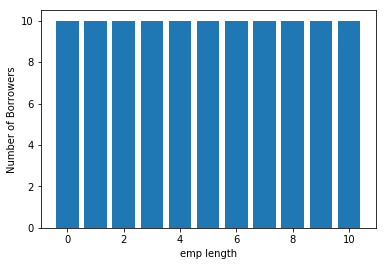

In [46]:
plt.bar(loan_df.emp_length, height=10)
plt.xlabel("emp length")
plt.ylabel("Number of Borrowers")
plt.show

### Correlation

In [ ]:
# To find the correlation among 
# the columns using pearson method 
corr = loan_df.corr(method ='pearson') 

In [ ]:
plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

In [ ]:
loan_df.dtypes

# Encoding

In [ ]:
ord_enc = OrdinalEncoder()

### Categorical Encoding

In [ ]:
obj_loan_df["grade"] = ord_enc.fit_transform(loan_df[["grade"]]).astype(int)
obj_loan_df["sub_grade"] = ord_enc.fit_transform(loan_df[["sub_grade"]]).astype(int)
obj_loan_df["home_ownership"] = ord_enc.fit_transform(obj_loan_df[["home_ownership"]]).astype(int)
obj_loan_df["verification_status"] = ord_enc.fit_transform(obj_loan_df[["verification_status"]]).astype(int)
obj_loan_df["loan_status"] = ord_enc.fit_transform(obj_loan_df[["loan_status"]]).astype(int)
obj_loan_df["purpose"] = ord_enc.fit_transform(obj_loan_df[["purpose"]]).astype(int)
obj_loan_df["addr_state"] = ord_enc.fit_transform(obj_loan_df[["addr_state"]]).astype(int)
obj_loan_df["debt_settlement_flag"] = ord_enc.fit_transform(obj_loan_df[["debt_settlement_flag"]]).astype(int)

### Dates (not working with PCA)

In [ ]:
obj_loan_df['issue_d'] = obj_loan_df['issue_d'].apply(lambda x: datetime.datetime.strptime(x, '%b-%d'))

In [ ]:
#obj_loan_df['earliest_cr_line'] = obj_loan_df['earliest_cr_line'].apply(lambda x: datetime.datetime.strptime(x, '%b-%y'))

In [ ]:
#obj_loan_df['last_credit_pull_d'] = obj_loan_df['last_credit_pull_d'].apply(lambda x: datetime.datetime.strptime(x, '%b-%d'))

In [ ]:
#obj_loan_df['last_pymnt_d'] = obj_loan_df['last_pymnt_d'].apply(lambda x: datetime.datetime.strptime(x, '%b-%d'))

In [ ]:
obj_loan_df.head()

In [ ]:
loan_df.grade = obj_loan_df.grade
loan_df.sub_grade = obj_loan_df.sub_grade
loan_df.emp_length = obj_loan_df.emp_length
loan_df.home_ownership = obj_loan_df.home_ownership
loan_df.verification_status = obj_loan_df.verification_status
loan_df.issue_d = obj_loan_df.issue_d
loan_df.loan_status = obj_loan_df.loan_status
loan_df.purpose = obj_loan_df.purpose
loan_df.addr_state = obj_loan_df.addr_state
loan_df.revol_util = obj_loan_df.revol_util
loan_df.debt_settlement_flag = obj_loan_df.debt_settlement_flag
loan_df.term = obj_loan_df['term_(months)']
loan_df.int_rate = obj_loan_df['int_rate_%']

In [ ]:
loan_df = loan_df.drop(columns= ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'])

### Replacing NaN values with mode

In [ ]:
loan_df.info()

In [ ]:
# mean=df['bedrooms'].mean()
# df['bedrooms'].replace(np.nan,mean, inplace=True)
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(loan_df)

In [ ]:
loan_df.isna().sum()

In [ ]:
loan_df.delinq_2yrs.unique()
loan_df.delinq_2yrs.value_counts()
loan_df.delinq_2yrs = loan_df.delinq_2yrs.fillna(0)
loan_df.delinq_2yrs.unique()

In [ ]:
loan_df.inq_last_6mths.unique()
loan_df.inq_last_6mths.value_counts()
loan_df.inq_last_6mths = loan_df.inq_last_6mths.fillna(0)
loan_df.inq_last_6mths.unique()

In [ ]:
loan_df.open_acc.unique()
loan_df.open_acc.value_counts()
loan_df.open_acc = loan_df.open_acc.fillna(7.0)
loan_df.open_acc.unique()

In [ ]:
loan_df.pub_rec.unique()
loan_df.pub_rec.value_counts()
loan_df.pub_rec = loan_df.pub_rec.fillna(0)
loan_df.pub_rec.unique()

In [ ]:
loan_df.revol_util.unique()
loan_df.revol_util.value_counts()
loan_df.revol_util = loan_df.revol_util.fillna(0)
loan_df.revol_util.unique()

In [ ]:
loan_df.total_acc.unique()
loan_df.total_acc.value_counts()
loan_df.total_acc = loan_df.total_acc.fillna(15.0)
loan_df.total_acc.unique()

In [ ]:
loan_df.acc_now_delinq.unique()
loan_df.acc_now_delinq.value_counts()
loan_df.acc_now_delinq = loan_df.acc_now_delinq.fillna(0)
loan_df.acc_now_delinq.unique()

In [ ]:
loan_df.delinq_amnt.unique()
loan_df.delinq_amnt.value_counts()
loan_df.delinq_amnt = loan_df.delinq_amnt.fillna(0)
loan_df.delinq_amnt.unique()

In [ ]:
loan_df.pub_rec_bankruptcies.unique()
loan_df.pub_rec_bankruptcies.value_counts()
loan_df.pub_rec_bankruptcies = loan_df.pub_rec_bankruptcies.fillna(0)
loan_df.pub_rec_bankruptcies.unique()

In [ ]:
loan_df.tax_liens .unique()
loan_df.tax_liens .value_counts()
loan_df.tax_liens  = loan_df.tax_liens .fillna(0)
loan_df.tax_liens .unique()

In [ ]:
loan_df['emp_length'] = loan_df['emp_length'].astype(int)

In [ ]:
loan_df.info()

In [ ]:
loan_df.head()

In [ ]:
fl_loan_df = loan_df.select_dtypes(include=['flos']).copy()

# Prediction

In [ ]:
X = loan_df.drop(columns='loan_status')
y = loan_df['loan_status']

In [ ]:
pca = PCA(n_components=10)
pca.fit(X)

In [ ]:
np.isfinite(loan_df).sum()

### SVC

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
clf = make_pipeline(Normalizer(), SVC(gamma='auto'))
clf.fit(X_train, y_train)